<a href="https://colab.research.google.com/github/varenyaa/Openweaver_SentimentalAnalysis/blob/main/Openweaver_SentimentalAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

In [4]:
# Load the dataset
df = pd.read_csv("/content/IMDB Dataset.csv")


In [5]:
# Display the first few rows of the dataset
print(df.head())

                                              review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive


In [6]:
# Check the distribution of sentiment labels
print(df['sentiment'].value_counts())

positive    25000
negative    25000
Name: sentiment, dtype: int64


In [7]:
# Calculate the percentage of positive and negative reviews
positive_reviews = (df['sentiment'] == 'positive').sum()
negative_reviews = (df['sentiment'] == 'negative').sum()
total_reviews = len(df)
positive_percentage = positive_reviews / total_reviews * 100
negative_percentage = negative_reviews / total_reviews * 100
print(f"Positive reviews: {positive_percentage:.2f}%")
print(f"Negative reviews: {negative_percentage:.2f}%")


Positive reviews: 50.00%
Negative reviews: 50.00%


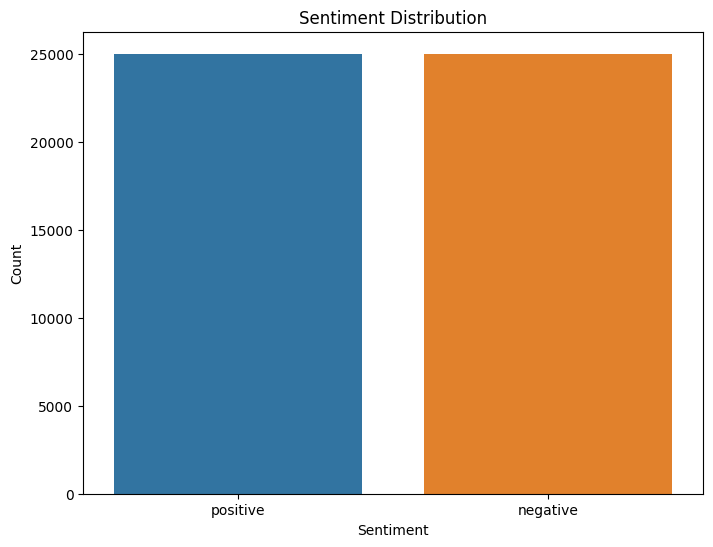

In [8]:
# Plot the distribution of sentiment labels
plt.figure(figsize=(8, 6))
sns.countplot(x='sentiment', data=df)
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

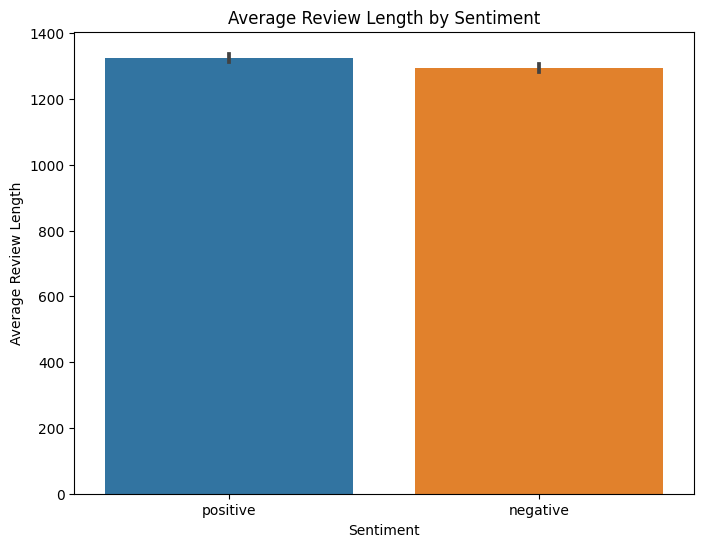

In [9]:
# Bar Graph
plt.figure(figsize=(8, 6))
df['review_length'] = df['review'].apply(len)
sns.barplot(x='sentiment', y='review_length', data=df)
plt.title('Average Review Length by Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Average Review Length')
plt.show()

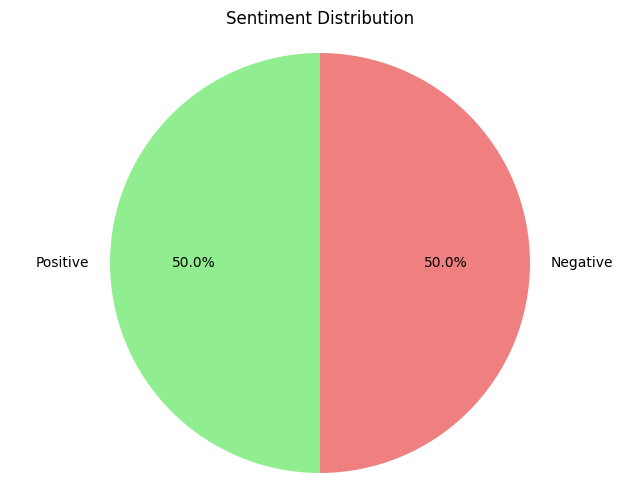

In [10]:
# Pie Chart
labels = ['Positive', 'Negative']
sizes = [positive_reviews, negative_reviews]
colors = ['lightgreen', 'lightcoral']
plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Sentiment Distribution')
plt.axis('equal')
plt.show()

In [12]:
# Split the dataset into training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(df['review'], df['sentiment'],test_size=0.2, random_state=42)

In [14]:
# Convert text data into numerical features using TF-IDF
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

In [15]:
# Train a LinearSVC model
model = LinearSVC()
model.fit(X_train_tfidf, y_train)

LinearSVC()

In [16]:
# Make predictions on the test set
y_pred = model.predict(X_test_tfidf)

In [19]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.90
